## Load packages

In [29]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, confusion_matrix

%matplotlib inline

## Load and Preprocess Data 

In [30]:
data='/Users/alejandro/AnacondaProjects/Actuary Data/train_set.csv'
df = pd.read_csv(data, nrows=100000)
df.head(10)

,Row_ID,Household_ID,Vehicle,Calendar_Year,Model_Year,Blind_Make,Blind_Model,Blind_Submodel,Cat1,Cat2,...,Var5,Var6,Var7,Var8,NVCat,NVVar1,NVVar2,NVVar3,NVVar4,Claim_Amount
0,1,1,3,2005,2005,K,K.78,K.78.2,D,C,...,1.008912,0.261040,0.907793,-0.077998,M,-0.231530,-0.266117,-0.272337,-0.251419,0.0
1,2,2,2,2005,2003,Q,Q.22,Q.22.3,B,C,...,1.240851,0.432987,-0.726459,0.204785,O,-0.231530,-0.266117,-0.272337,-0.251419,0.0
2,3,3,1,2005,1998,AR,AR.41,AR.41.1,B,?,...,-0.971487,-1.405797,-0.837048,-1.176858,F,-0.231530,-0.266117,-0.272337,-0.251419,0.0
3,4,3,1,2006,1998,AR,AR.41,AR.41.1,B,?,...,-0.971487,-1.405797,-0.837048,-1.176858,F,-0.231530,-0.266117,-0.272337,-0.251419,0.0
4,5,3,2,2005,2001,D,D.20,D.20.0,J,C,...,0.812656,2.112691,1.534462,2.347260,F,-0.231530,-0.266117,-0.272337,-0.251419,0.0
5,6,3,2,2006,2001,D,D.20,D.20.0,J,C,...,0.812656,2.112691,1.534462,2.347260,F,-0.231530,-0.266117,-0.272337,-0.251419,0.0
6,7,4,1,2006,2001,AJ,AJ.129,AJ.129.3,G,C,...,0.580718,0.551128,0.416289,-0.024395,M,-0.231530,-0.266117,-0.272337,-0.251419,0.0
7,8,4,2,2006,2002,AQ,AQ.17,AQ.17.1,B,C,...,0.527193,-0.023200,-0.701884,0.226664,M,-0.231530,-0.266117,-0.272337,-0.251419,0.0
8,9,4,3,2005,2002,AQ,AQ.17,AQ.17.1,B,C,...,0.527193,-0.023200,-0.701884,0.226664,M,-0.231530,-0.266117,-0.272337,-0.251419,0.0
9,10,5,1,2005,1995,BW,BW.3,BW.3.0,D,?,...,0.176312,0.283264,0.969232,-0.792339,N,2.054683,-0.266117,-0.272337,-0.251419,0.0


In [31]:
df_nz = df['Claim_Amount'][df['Claim_Amount']!=0]
print('Claim amount: min: {}, max: {}, mean: {}, sd: {}'.format(
    round(df_nz.min(), 2),
    round(df_nz.max(), 2),
    round(df_nz.mean(), 2),
    round(df_nz.std(), 2)
))

Claim amount: min: 0.24, max: 2920.52, mean: 139.51, sd: 257.12


(array([ 527.,   60.,   14.,   10.,    5.,    2.,    0.,    0.,    0.,    1.]),
 array([  2.40892800e-01,   2.92268904e+02,   5.84296914e+02,
          8.76324925e+02,   1.16835294e+03,   1.46038095e+03,
          1.75240896e+03,   2.04443697e+03,   2.33646498e+03,
          2.62849299e+03,   2.92052100e+03]),
 <a list of 10 Patch objects>)

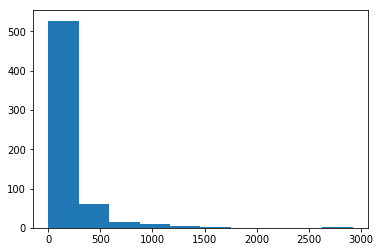

In [32]:
plt.hist(df_nz)

In [33]:
# dummy code claims
df['claim'] = df.Claim_Amount.apply(lambda x: 0 if x == 0 else 1)
df['Model_Year'] = df['Model_Year'] - np.min(df['Model_Year'])
df['Model_Year'] = df['Model_Year'].astype('float64')
df.head()

,Row_ID,Household_ID,Vehicle,Calendar_Year,Model_Year,Blind_Make,Blind_Model,Blind_Submodel,Cat1,Cat2,...,Var6,Var7,Var8,NVCat,NVVar1,NVVar2,NVVar3,NVVar4,Claim_Amount,claim
0,1,1,3,2005,24.0,K,K.78,K.78.2,D,C,...,0.261040,0.907793,-0.077998,M,-0.23153,-0.266117,-0.272337,-0.251419,0.0,0
1,2,2,2,2005,22.0,Q,Q.22,Q.22.3,B,C,...,0.432987,-0.726459,0.204785,O,-0.23153,-0.266117,-0.272337,-0.251419,0.0,0
2,3,3,1,2005,17.0,AR,AR.41,AR.41.1,B,?,...,-1.405797,-0.837048,-1.176858,F,-0.23153,-0.266117,-0.272337,-0.251419,0.0,0
3,4,3,1,2006,17.0,AR,AR.41,AR.41.1,B,?,...,-1.405797,-0.837048,-1.176858,F,-0.23153,-0.266117,-0.272337,-0.251419,0.0,0
4,5,3,2,2005,20.0,D,D.20,D.20.0,J,C,...,2.112691,1.534462,2.347260,F,-0.23153,-0.266117,-0.272337,-0.251419,0.0,0


In [34]:
# separate feature matrix from labels (claims in {0 = No claim, 1 = Claim})
# only continuous variables are included in the model
X = df[['Var5', 'Var6', 'Var7', 'Var8', 'NVVar1', 'NVVar2', 'NVVar3', 'NVVar4', 'Vehicle', 'Model_Year', 'Blind_Submodel']]
y = df[['claim', 'Claim_Amount']].values

In [35]:
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [36]:
def pipeline(X):
    df_cont = pd.DataFrame()
    df_cat = pd.DataFrame()
    for x in X:
        if X[x].dtypes == 'float64':
            df_cont['{}'.format(x)] = X[x]
        else:
            df_cat['{}'.format(x)] = X[x]
    
    dummy = OneHotEncoder()
    dummyC = LabelEncoder()
    
    df_cat2 = np.zeros((df_cat.shape[0], 1))
    for x in df_cat:
        y = dummyC.fit_transform(df_cat[x].reshape(-1, 1))
        y = dummy.fit_transform(y.reshape(-1, 1)).toarray()
        y = pd.DataFrame(y[:, 1:])
        df_cat2 = np.hstack((df_cat2, y))
    df_cat = pd.DataFrame(df_cat2)
    
    pca = PCA(n_components=10)
    pca.fit_transform(df_cat)
    k = np.argmax(np.cumsum(pca.explained_variance_ratio_) > 0.95) + 1
    pca = PCA(n_components=k)
    df_cat_pca = pca.fit_transform(df_cat)
    df_cat = pd.DataFrame(df_cat_pca)
    
    return df_cont, df_cat

X_train_cont, X_train_cat = pipeline(X_train)
X_test_cont, X_test_cat = pipeline(X_test)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  from ipykernel import kernelapp as app
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [37]:
# scale features to have same variance
sc = StandardScaler()
X_train_cont = sc.fit_transform(X_train_cont)
X_test_cont = sc.transform(X_test_cont)

In [38]:
X_train = pd.concat([pd.DataFrame(X_train_cont), pd.DataFrame(X_train_cat)], axis=1)
X_test = pd.concat([pd.DataFrame(X_test_cont), pd.DataFrame(X_test_cat)], axis=1)

## Layer 1 - classify claim or no claim

In [39]:
def create_model(model, X, y):
    if model == 'lr':
        myModel = LogisticRegression(random_state=42, class_weight='balanced', n_jobs=-1)
    elif model == 'svm':
        myModel = SVC(kernel='linear', random_state=42, class_weight='balanced', cache_size=2048)
    elif model == 'rf':
        myModel = RandomForestClassifier(random_state=42, class_weight='balanced', n_jobs=-1)
    else:
        raise error('cannot fit that model')
    
    myModel.fit(X, y)
    
    y_pred = myModel.predict(X)
    in_acc = accuracy_score(y_pred, y)
    tn, fp, fn, tp = confusion_matrix(y_pred, y).ravel()
    print('Accuracy: {}, Precision: {}, Recall: {}'.format(round(in_acc, 2), tp / (tp + fp), tp / (tp + fn)))
    print(pd.DataFrame(confusion_matrix(y_pred, y)))
    
    return y_pred

In [40]:
pred1 = create_model('lr', X_train, y_train[:,0])
pred2 = create_model('svm', X_train, y_train[:,0])
pred3 = create_model('rf', X_train, y_train[:,0])

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


Accuracy: 0.67, Precision: 0.46357615894039733, Recall: 0.00838758637216919
       0    1
0  49720  243
1  24827  210
Accuracy: 0.79, Precision: 0.3355408388520971, Recall: 0.009589905362776025
       0    1
0  58849  301
1  15698  152
Accuracy: 0.96, Precision: 0.7108167770419426, Recall: 0.10852713178294573
       0    1
0  71902  131
1   2645  322


In [41]:
lr_pred = pd.Series(pred1 * 0.67)
svm_pred = pd.Series(pred2 * 0.79)
rf_pred = pd.Series(pred3 * 0.96)

In [42]:
final_pred = pd.DataFrame([lr_pred, svm_pred, rf_pred]).sum()
final_pred = final_pred.apply(lambda x: 1 if x > 1 else 0)
in_acc = accuracy_score(final_pred, y_train[:,0])
tn, fp, fn, tp = confusion_matrix(final_pred, y_train[:,0]).ravel()
print('Accuracy: {}, Precision: {}, Recall: {}'.format(round(in_acc, 2), tp / (tp + fp), tp / (tp + fn)))
confusion_matrix(final_pred, y_train[:,0])

Accuracy: 0.8, Precision: 0.4260485651214128, Recall: 0.013069682399945826


array([[59973,   260],
       [14574,   193]])

In [ ]:
y_pred = model.predict(X_test)
out_acc = accuracy_score(y_pred, y_test[:,0])
tn, fp, fn, tp = confusion_matrix(y_pred, y_test[:,0]).ravel()
print('In-sample accuracy: {}, Precision: {}, Recall: {}'.format(round(out_acc, 2), tp / (tp + fp), tp / (tp + fn)))
confusion_matrix(y_pred, y_test[:,0])

## Layer 2 - predict claim value

In [16]:
X_train_claims = X_train[y_train[:,0] == 1]
y_train_claims = y_train[y_train[:,1] != 0, 1]
y_train_claims = np.log(1 + y_train_claims)

X_test_claims = X_test[y_test[:,0] == 1]
y_test_claims = y_test[y_test[:,1] != 0, 1]
y_test_claims = np.log(1 + y_test_claims)

(array([ 12.,  34.,  59.,  83.,  84.,  63.,  53.,  44.,  16.,   5.]),
 array([ 0.21583112,  0.99223397,  1.76863683,  2.54503968,  3.32144253,
         4.09784539,  4.87424824,  5.65065109,  6.42705394,  7.2034568 ,
         7.97985965]),
 <a list of 10 Patch objects>)

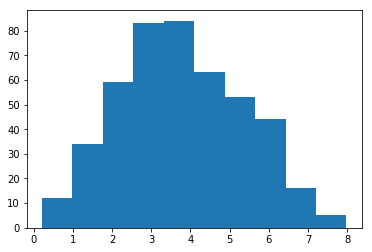

In [17]:
plt.hist(y_train_claims)

In [18]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(random_state=42)
regr.fit(X_train_claims, y_train_claims)

# get in and out of sample accuracy
y_pred = regr.predict(X_train_claims)
in_RMSE = np.sqrt(mean_squared_error(y_pred, y_train_claims))
y_pred = regr.predict(X_test_claims)
out_RMSE = np.sqrt(mean_squared_error(y_pred, y_test_claims))
rSquared = regr.score(X_train_claims, y_train_claims)
print('In-sample RMSE: {}\nOut-of-sample RMSE: {}\nRsquared: {}'.format(in_RMSE, out_RMSE, rSquared))

In-sample RMSE: 0.758369233525951
Out-of-sample RMSE: 1.8482426902978453
Rsquared: 0.771085045775856


In [19]:
RMSEDollars = np.sqrt(mean_squared_error(np.expm1(regr.predict(X_train_claims)), np.expm1(y_train_claims)))
print('RMSE in US$:', RMSEDollars)
RMSEDollars = np.sqrt(mean_squared_error(np.expm1(regr.predict(X_test_claims)), np.expm1(y_test_claims)))
print('RMSE in US$:', RMSEDollars)

RMSE in US$: 184.11952514
RMSE in US$: 245.385629492


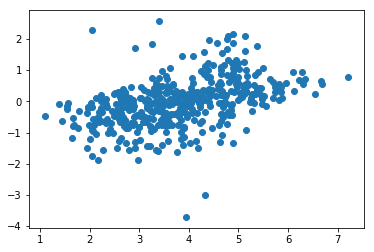

In [20]:
plt.scatter(x=regr.predict(X_train_claims), y=y_train_claims - regr.predict(X_train_claims))

## Join layers 1 and 2 for final predictions

In [21]:
model1 = RandomForestClassifier(random_state=42, class_weight='balanced')
model1.fit(X_train, y_train[:,0])

model2 = RandomForestRegressor(random_state=42)
model2.fit(X_train_claims, y_train_claims)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [22]:
def join_predict(model1, model2, X, y_cat, y_cont):
    
    print('clasifying (layer1)...')

    layer1 = model1.predict(X)
    
    print('regressing (layer2)...')
    X2 = X[layer1 != 0]
    print('Length of layer 2 :', len(X2))
    y2 = y_cont[layer1 != 0]
    layer2 = model2.predict(X2)
    
    layer1[layer1 != 0] = layer2
    
    print('done!')
    
    return layer1

In [23]:
y_pred_train = join_predict(model1, model2, X_train, y_train[:,0], np.log(1 + y_train[:,1]))

clasifying (layer1)...
regressing (layer2)...
Length of layer 2 : 2967
done!


In [24]:
# get prediction error
in_RMSE = np.sqrt(mean_squared_error(y_pred_train, np.log(1 + y_train[:,1])))
rSquared = regr.score(X_train, np.log(1 + y_train[:,1]))
print('RMSE: {}\nRsquared: {}'.format(in_RMSE, rSquared))

RMSE: 0.7690588860370915
Rsquared: -149.98021378156534


In [25]:
acc = np.sqrt(mean_squared_error(y_pred_train, np.log(1 + y_train[:, 1])))
print('Final model accuracy on train set (in log):', acc)
print('Error for a ${} prediction: +/-  US${}'.format(np.expm1(4.6), np.expm1(4.6 + acc)))
print('Error for a ${} prediction: +/-  US${}'.format(np.expm1(6.9), np.expm1(6.9 + acc)))

Final model accuracy on train set (in log): 0.769058886037
Error for a $98.48431564193378 prediction: +/-  US$213.66075238112242
Error for a $991.2747156050262 prediction: +/-  US$2140.0655101371203


In [26]:
y_pred_test = join_predict(model1, model2, X_test, y_test[:,0], np.log(1 + y_test[:,1]))

clasifying (layer1)...
regressing (layer2)...
Length of layer 2 : 199
done!


In [27]:
acc = np.sqrt(mean_squared_error(y_pred_test, np.log(1 + y_test[:, 1])))
print('Final model accuracy on test set (in log):', acc)
print('Error for a $100 prediction: +/-  US$', round(np.expm1(2 + acc), 2))
print('Error for a $1000 prediction: +/-  US$', round(np.expm1(3 + acc), 2))

Final model accuracy on test set (in log): 0.48392531206
Error for a $100 prediction: +/-  US$ 10.99
Error for a $1000 prediction: +/-  US$ 31.59


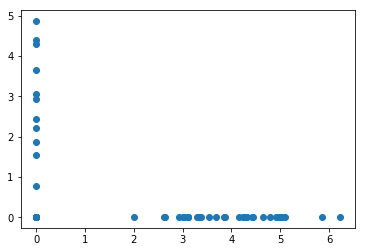

In [28]:
plt.scatter(y_pred_train[:1000], np.log(1 + y_test[:1000, 1]))

In [ ]:
plt.hist(y_pred_train[:1000])